In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
evts = pd.read_csv("data/events.csv", dtype = {"event_id": np.int16, "application_id": np.int16}, usecols = ["date", "application_id", "attributed", "event_uuid", "connection_type", "device_language"])
inst = pd.read_csv("data/installs.csv", dtype = {"application_id": np.int16, "click_hash": np.float16})
#clks = pd.read_csv("data/clicks.csv.gzip", dtype = {"advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "wifi_connection": bool, "carrier_id": np.float16, "brand": np.float16, "touchX": np.float16, "touchY": np.float16})

/home/sol/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Intento encontrar algo entre los events y las instalaciones

In [3]:
evts.columns

Index(['date', 'application_id', 'attributed', 'event_uuid', 'connection_type',
       'device_language'],
      dtype='object')

In [4]:
inst.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

## Veo como se comportan los eventos según su tipo de conexión

In [36]:
#Catidad de eventos según el tipo de conexión
conexiones = evts['connection_type'].value_counts() 
conexiones

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

Text(0.5, 0, 'Tipo de conexión')

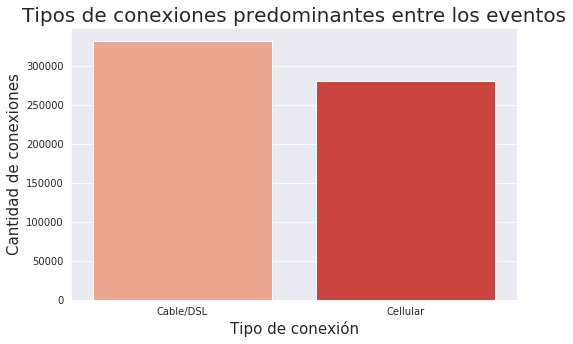

In [37]:
#Como el tipo Corporate tiene tan solo 4 apariciones y los otros más de 2 millones,
#sucede que tiene un valor despreciable frente a los otros dos, 
#por lo que podría solo tomar en cuenta los tipos de conexión predominantes.
plt.figure(figsize=(8,5)) 
conexiones = conexiones.drop(labels = ['Corporate'], axis = 0)
grf2 = sns.barplot(x = conexiones.index, y = conexiones.values, orient = 'v', palette = 'Reds') 
grf2.set_title("Tipos de conexiones predominantes entre los eventos", fontsize = 20)
grf2.set_ylabel("Cantidad de conexiones", fontsize = 15)
grf2.set_xlabel("Tipo de conexión", fontsize = 15)


## ¿Qué hay entre el campo "application_id" del set "events" y el set "installs"?

In [7]:
apps_populares_evts = evts["application_id"].value_counts().nlargest(10)
apps_populares_evts

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
Name: application_id, dtype: int64

Text(0.5, 0, 'Cantidad de eventos')

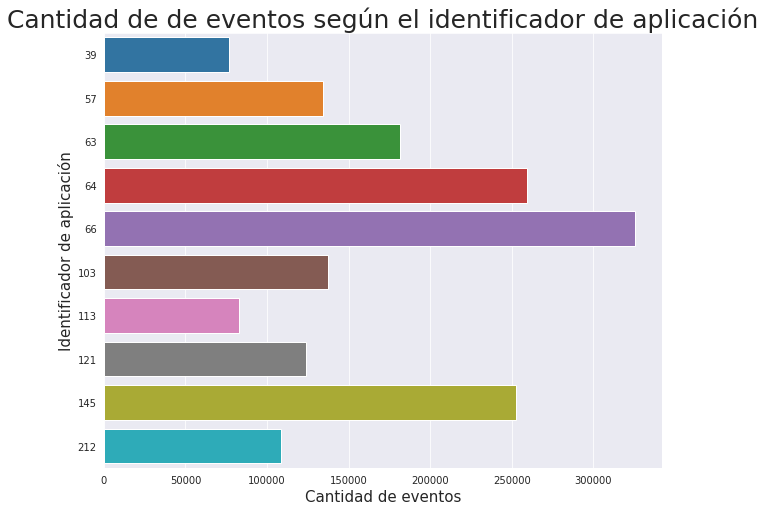

In [8]:
plt.figure(figsize=(10,8)) 
sns.set_style('darkgrid') 
grf3 = sns.barplot(x = apps_populares_evts.values, y = apps_populares_evts.index, orient = 'h') 
grf3.set_title("Cantidad de de eventos según el identificador de aplicación", fontsize = 25) 
grf3.set_ylabel("Identificador de aplicación", fontsize = 15) 
grf3.set_xlabel("Cantidad de eventos", fontsize = 15)

In [9]:
apps_populares_inst = inst["application_id"].value_counts().nlargest(10)
apps_populares_inst

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
Name: application_id, dtype: int64

Text(0.5, 0, 'Cantidad de instalaciones')

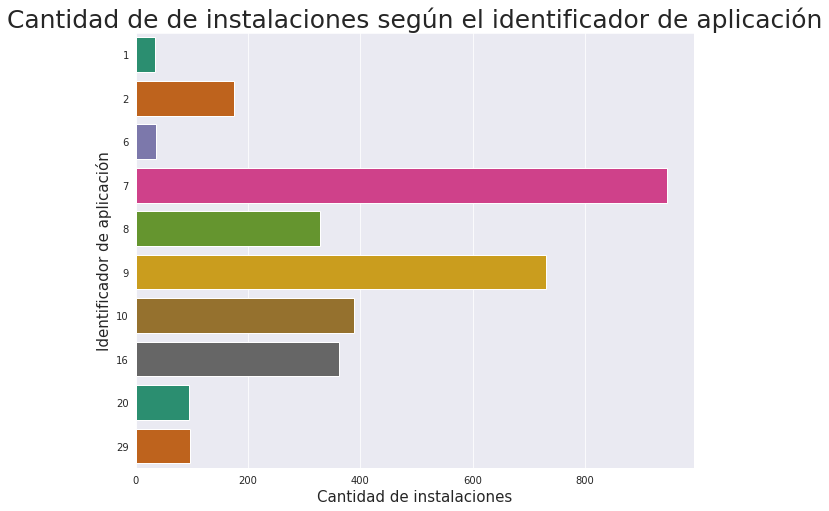

In [10]:
plt.figure(figsize=(10,8)) 
sns.set_style('darkgrid') 
grf3 = sns.barplot(x = apps_populares_inst.values, y = apps_populares_inst.index, orient = 'h', palette = 'Dark2') 
grf3.set_title("Cantidad de de instalaciones según el identificador de aplicación", fontsize = 25) 
grf3.set_ylabel("Identificador de aplicación", fontsize = 15) 
grf3.set_xlabel("Cantidad de instalaciones", fontsize = 15)

## Vemos que sucede con los eventos y las instalaciones atribuidas a Jammp


In [11]:
#Eventos atribuidos a jummp 
eventos_atrib_app = evts['attributed'].value_counts()
eventos_atrib_app

False    2489324
True        5099
Name: attributed, dtype: int64

Notamos que del total de eventos son muy pocos los atribuidos a Jammp.

Veamos ahora que encontramos en las instalaciones.

In [12]:
#instalaciones atribuidas a Jammp
inst['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [13]:
inst['created'].head()

0    2019-03-13 01:43:33.445
1    2019-03-13 04:58:35.078
2    2019-03-13 04:20:57.666
3    2019-03-13 04:20:57.698
4    2019-03-10 22:24:56.684
Name: created, dtype: object

De las instalaciones directamente ninguna es atribuida a Jammp.


## Quiero ver a qué tipo de instalación están relacionados los session_user_agent qué realizaron más instalaciones

In [14]:
#cuento los tipos de installación posibles y filtro los que tienen menos de 5 instalaciones
inst_kind = inst['kind'].value_counts().nlargest(10)
inst_kind

af_app_opened                 428
app_open                      212
EVENT_Homepage                 70
open                           36
EVENT_OPEN_APP                 33
Open                           22
login_success                  17
account_summary_first_step     13
EVENT_LISTINGVIEW_FLIGHT        6
EVENT_HOMEPAGE                  6
Name: kind, dtype: int64

In [15]:
#veo cuantos session_user_agents hay filtrando los que tengan menos de 5 intallaciones
session_inst = inst['session_user_agent'].value_counts().nlargest(4)
session_inst

http-kit/2.0                                                                                                                                 1729
adjust.com                                                                                                                                   1592
HasOffers Mobile AppTracking v1.0                                                                                                              22
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1      10
Name: session_user_agent, dtype: int64

In [16]:
session_and_kind = inst.groupby(['kind','session_user_agent']).agg({'created': 'count'})
session_and_kind

,,created
kind,session_user_agent,
EVENT_HOMEPAGE,adjust.com,6
EVENT_Homepage,adjust.com,70
EVENT_LISTINGVIEW_FLIGHT,adjust.com,6
EVENT_OPEN_APP,adjust.com,33
EVENT_PROMO,adjust.com,1
Open,HasOffers Mobile AppTracking v1.0,22
account_summary_first_step,http-kit/2.0,13
af_app_opened,http-kit/2.0,428
af_list_view,http-kit/2.0,1


Veamos que pasa con los que no se conoce el tipo:

In [17]:
# Relleno los Nan con un string 'desconocido'
inst_kind = inst.filter(items = ['created', 'kind', 'session_user_agent']).fillna('desconocido')
inst_kind.groupby(['kind','session_user_agent']).agg({'created': 'count'})

,,created
kind,session_user_agent,
EVENT_HOMEPAGE,adjust.com,6
EVENT_Homepage,adjust.com,70
EVENT_LISTINGVIEW_FLIGHT,adjust.com,6
EVENT_OPEN_APP,adjust.com,33
EVENT_PROMO,adjust.com,1
Open,HasOffers Mobile AppTracking v1.0,22
account_summary_first_step,http-kit/2.0,13
af_app_opened,http-kit/2.0,428
af_list_view,http-kit/2.0,1


Modifico los nombres de los session_user_agent para que sean más facil de leer. Como puede verse los session_user_agent que corresponden a Mozilla son muchos pero tiene muy pocas installs, así que los vamos a agrupar

In [18]:
def perteneceAMozilla(x):
    return 'Mozilla' in x

inst_kind['sessionUserAgent'] = inst_kind['session_user_agent'].apply(lambda x : 'Mozilla' if perteneceAMozilla(x) else x)
inst_kind.head(10)

,created,kind,session_user_agent,sessionUserAgent
0,2019-03-13 01:43:33.445,desconocido,desconocido,desconocido
1,2019-03-13 04:58:35.078,desconocido,desconocido,desconocido
2,2019-03-13 04:20:57.666,Open,HasOffers Mobile AppTracking v1.0,HasOffers Mobile AppTracking v1.0
3,2019-03-13 04:20:57.698,desconocido,desconocido,desconocido
4,2019-03-10 22:24:56.684,Open,HasOffers Mobile AppTracking v1.0,HasOffers Mobile AppTracking v1.0
5,2019-03-10 22:24:57.545,desconocido,desconocido,desconocido
6,2019-03-11 03:47:22.802,Open,HasOffers Mobile AppTracking v1.0,HasOffers Mobile AppTracking v1.0
7,2019-03-11 21:21:05.986,desconocido,desconocido,desconocido
8,2019-03-11 21:21:05.855,Open,HasOffers Mobile AppTracking v1.0,HasOffers Mobile AppTracking v1.0
9,2019-03-13 08:29:31.875,desconocido,http-kit/2.0,http-kit/2.0


In [19]:
count_session_kind = inst_kind.groupby(['kind','sessionUserAgent']).agg({'created': 'count'})
count_session_kind.head(10)

,,created
kind,sessionUserAgent,
EVENT_HOMEPAGE,adjust.com,6
EVENT_Homepage,adjust.com,70
EVENT_LISTINGVIEW_FLIGHT,adjust.com,6
EVENT_OPEN_APP,adjust.com,33
EVENT_PROMO,adjust.com,1
Open,HasOffers Mobile AppTracking v1.0,22
account_summary_first_step,http-kit/2.0,13
af_app_opened,http-kit/2.0,428
af_list_view,http-kit/2.0,1


In [20]:
count_session_kind = count_session_kind.reset_index()
count_session_kind

,kind,sessionUserAgent,created
0,EVENT_HOMEPAGE,adjust.com,6
1,EVENT_Homepage,adjust.com,70
2,EVENT_LISTINGVIEW_FLIGHT,adjust.com,6
3,EVENT_OPEN_APP,adjust.com,33
4,EVENT_PROMO,adjust.com,1
5,Open,HasOffers Mobile AppTracking v1.0,22
6,account_summary_first_step,http-kit/2.0,13
7,af_app_opened,http-kit/2.0,428
8,af_list_view,http-kit/2.0,1
9,app_open,adjust.com,212


Ahora utilizo un Swarnplot para visualizar los datos

Text(0, 0.5, 'Tipo de instalación')

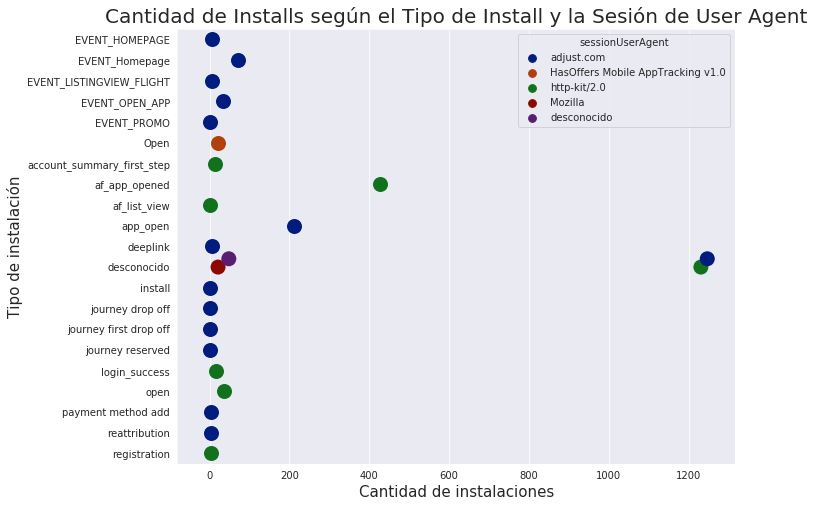

In [21]:
plt.figure(figsize = (10,8))
sns.set_palette("dark")
cat_plot = sns.swarmplot(y = "kind", x = "created", hue = "sessionUserAgent", data = count_session_kind, size = 15)
cat_plot.set_title("Cantidad de Installs según el Tipo de Install y la Sesión de User Agent", fontsize = '20')
cat_plot.set_xlabel("Cantidad de instalaciones", fontsize = 15)
cat_plot.set_ylabel("Tipo de instalación", fontsize = 15)

In [22]:
inst.describe()

,application_id,ref_type,ref_hash,click_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,3412.000000,3.412000e+03,3.412000e+03,0.0,3.412000e+03,1.047000e+03,3.411000e+03,3.412000e+03,3.378000e+03
mean,10.247655,1.736533e+18,4.598202e+18,NaN,4.764401e+18,1.877864e+18,4.245276e+18,4.562040e+18,4.915828e+18
std,6.016194,1.936976e+17,2.663828e+18,NaN,1.678051e+18,1.886461e+18,2.620844e+18,2.683422e+18,2.477019e+18
min,0.000000,1.494519e+18,4.958527e+15,NaN,2.970471e+18,3.083059e+17,5.112505e+16,7.118754e+15,1.101539e+17
25%,7.000000,1.494519e+18,2.268353e+18,NaN,2.970471e+18,3.083059e+17,2.331947e+18,2.249197e+18,3.301378e+18
50%,9.000000,1.891515e+18,4.603807e+18,NaN,6.333597e+18,2.208835e+18,2.983638e+18,4.436113e+18,3.301378e+18
75%,10.000000,1.891515e+18,6.912404e+18,NaN,6.333597e+18,2.523246e+18,6.882415e+18,7.017564e+18,6.977049e+18
max,36.000000,1.891515e+18,9.218934e+18,NaN,6.333597e+18,9.169527e+18,9.222450e+18,9.221950e+18,9.028383e+18


In [23]:
inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int16
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float16
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float16(1), float64(3), int16(1), int64(4), object(7)
memory usage: 393.3+ KB


## Veo desde qué fuente de publicidad se realizan más instalaciones

In [24]:
count_pub = inst['ref_type'].value_counts()
count_pub

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

Sabemos que solo hay dos focos posibles, publicidad de Apple (IFA) o publicidad de Google. 

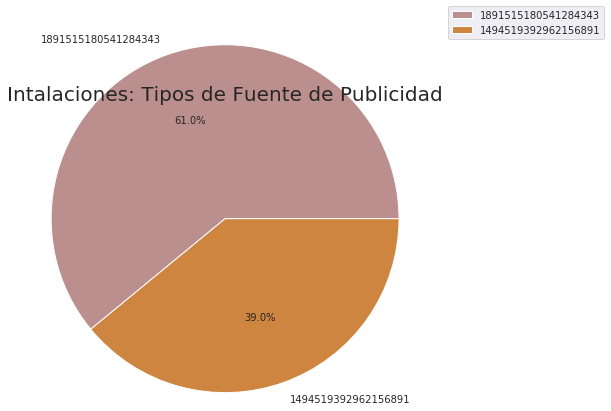

In [25]:
plt.pie(count_pub.values , labels = count_pub.index, autopct='%1.1f%%', colors = ['rosybrown', 'peru'], radius = 2)
plt.legend(count_pub.index, bbox_to_anchor=(1.5,1.5), loc = "upper left")
plt.title("Intalaciones: Tipos de Fuente de Publicidad", {'fontsize': 20,
        'fontweight' : 30,
        'verticalalignment': 'bottom',
        'horizontalalignment': 'center'})
plt.show()